In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("simulation_data.csv")

In [4]:
result = smf.ols(formula = "(y ~ points)",
                 data = df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.300
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0398
Time:                        17:19:14   Log-Likelihood:                -738.65
No. Observations:                 150   AIC:                             1481.
Df Residuals:                     148   BIC:                             1487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.4501      4.628      6.364      0.0

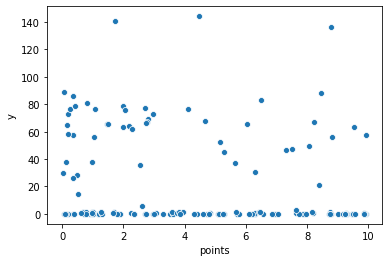

In [5]:
sns.scatterplot("points", "y", data = df)
plt.show()

In [6]:
result = smf.ols(formula = "(y ~ points + out_of_office)",
                 data = df[df["points"].notna()]).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     26.97
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.05e-10
Time:                        17:19:14   Log-Likelihood:                -717.35
No. Observations:                 150   AIC:                             1441.
Df Residuals:                     147   BIC:                             1450.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        38.5754      4.238      9.103

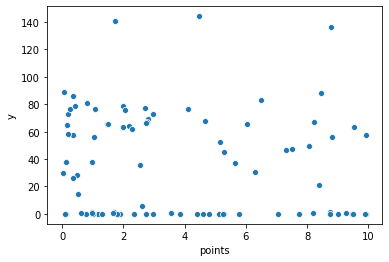

In [7]:
sns.scatterplot("points", "y", data = df[df["out_of_office"] == 0])
plt.show()

In [8]:
res_lm = smf.ols(formula = "(y ~ points + weekly_poll + pre_survey)",
                 data = df[df["points"].notna()]).fit()
print (res_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     15.27
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           9.45e-07
Time:                        17:19:18   Log-Likelihood:                -726.64
No. Observations:                 150   AIC:                             1459.
Df Residuals:                     147   BIC:                             1468.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3427      0.784     -0.437      

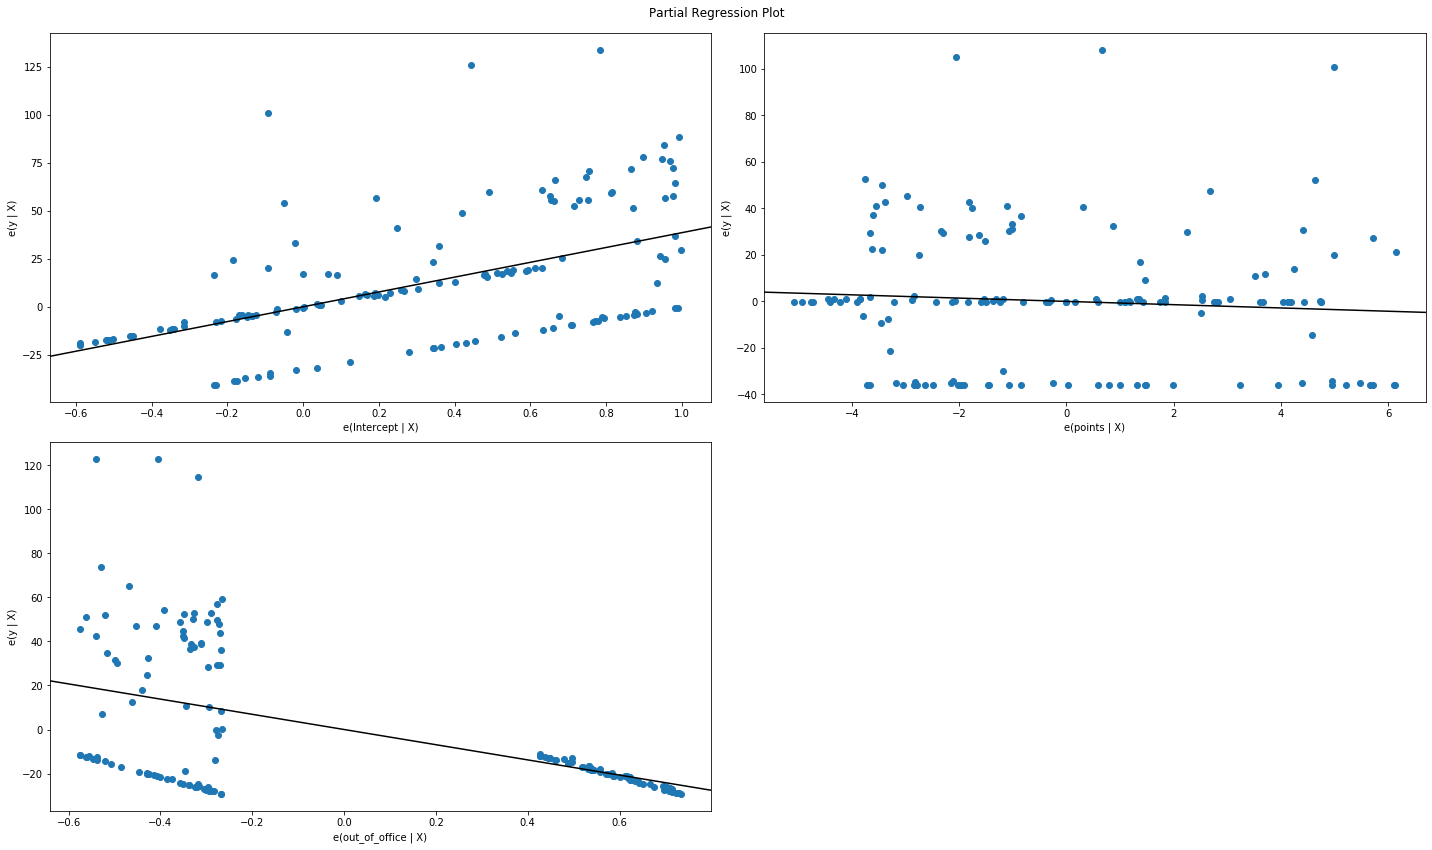

In [9]:
# The partial regression plot shows the relationship between the 
# response and the given explanatory variable after removing the 
# effect of all other explanatory variables in exog.

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

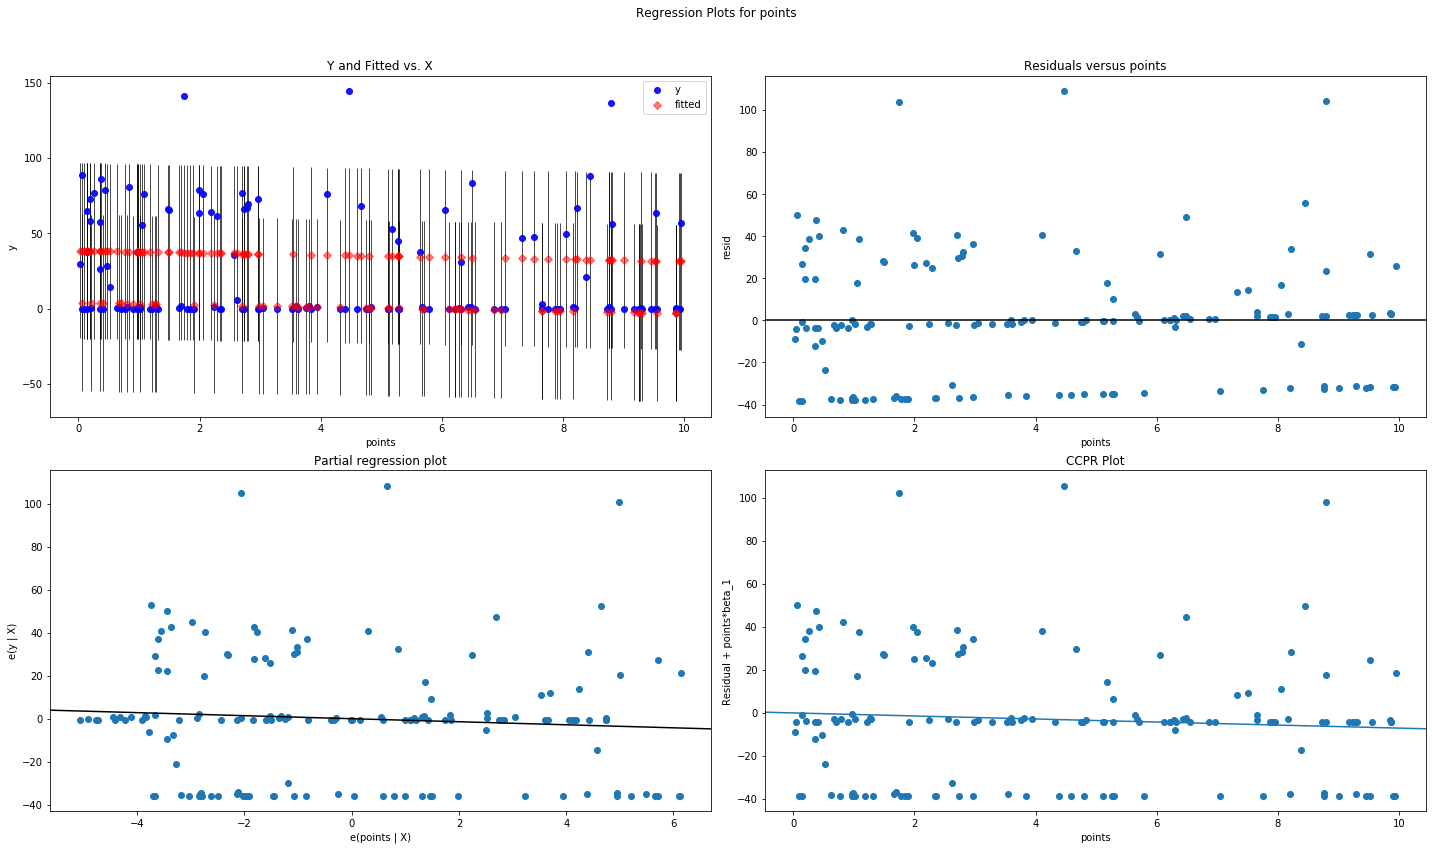

In [10]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_regress_exog(result, "points", fig=fig)

# Autoregressive Work

In [11]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
import numpy as np

In [11]:
df_working_hours = df[df["points"].notna()]

In [12]:
mod = AutoReg(df_working_hours["y"], 1, exog=df_working_hours[["points", "weekly_poll", "pre_survey", "0"]])
res = mod.fit()
res.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                   AutoReg-X(1)   Log Likelihood                -636.538
Method:               Conditional MLE   S.D. of innovations             17.342
Date:                Tue, 28 Apr 2020   AIC                              5.800
Time:                        12:54:38   BIC                              5.941
Sample:                             1   HQIC                             5.858
                                  150                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.5730      0.440      1.303      0.193      -0.289       1.435
y.L1            0.1499      0.047      3.202      0.001       0.058       0.242
points          0.1037      0.501      0.207      0.836      -0.878       1.086
weekly_poll     4.2650      1.314      3.245      0.001       1.689       6.841
pre_survey      1.7133      1.315      1.303      0.193      -0.864       4.291
0              -0.7263      0.044    -16.695      0.000      -0.812      -0.641
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.6709           +0.0000j            6.6709            0.0000
-----------------------------------------------------------------------------
"""

## Prediction

In [177]:
df["Timestamp"] = pd.date_range(start = pd.Timestamp("2018-09-20T00"), freq='H', periods = 360)

In [178]:
df_working_hours = df[df["points"].notna()].reset_index()

In [179]:
df_working_hours_train = df_working_hours.iloc[0:115].reset_index()
df_working_hours_test = df_working_hours.iloc[115:].reset_index()

In [180]:
mod_train = AutoReg(df_working_hours_train["y"], 3, 
                    exog=df_working_hours_train[["points", "weekly_poll", "pre_survey", "0"]])
res = mod_train.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                   AutoReg-X(3)   Log Likelihood                -472.524
Method:               Conditional MLE   S.D. of innovations             16.445
Date:                Wed, 29 Apr 2020   AIC                              5.761
Time:                        18:59:42   BIC                              5.979
Sample:                             3   HQIC                             5.849
                                  115                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1022      0.595      1.853      0.064      -0.063       2.268
y.L1            0.2011      0.056      3.580      0.000       0.091       0.311
y.L2           -0.0192      0.059     -0.325      0.745      -0.135       0.097
y.L3           -0.0630      0.056     -1.119      0.263      -0.173       0.047
points         -0.1695      0.539     -0.314      0.753      -1.227       0.888
weekly_poll     1.6105      2.524      0.638      0.523      -3.336       6.557
pre_survey      3.2956      1.778      1.853      0.064      -0.189       6.781
0              -0.6928      0.048    -14.464      0.000      -0.787      -0.599
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3740           -1.8195j            2.2800           -0.1471
AR.2            1.3740           +1.8195j            2.2800            0.1471
AR.3           -3.0530           -0.0000j            3.0530           -0.5000
-----------------------------------------------------------------------------
"""

In [181]:
int_index_test = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_test, inplace=True)

In [182]:
int_index_train = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_train, inplace=True)

In [183]:
predictions_0 = res.predict(start = df_working_hours_test.index[0], 
            end = df_working_hours_test.index[len(df_working_hours_test) - 1])

In [184]:
predictions = res.predict(start = df_working_hours_test.index[0], 
            end = df_working_hours_test.index[len(df_working_hours_test) - 1], 
            exog_oos = df_working_hours_test[["points", "weekly_poll", "pre_survey", "0"]],
                         dynamic = True)

In [185]:
%matplotlib inline

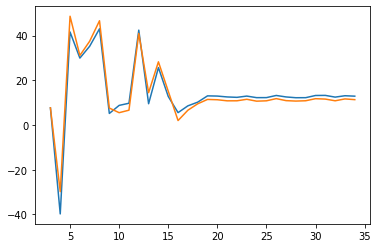

In [186]:
plt.plot(predictions)
plt.plot(predictions_0)

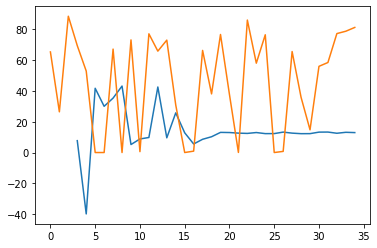

In [187]:
plt.plot(predictions)
plt.plot(df_working_hours_test["y"])

In [188]:
np.sqrt((np.mean(predictions - df_working_hours_test["y"])**2))

29.86811141130462

# Prediction 2

In [167]:
df["Timestamp"] = pd.date_range(start = pd.Timestamp("2018-09-20T00"), freq='H', periods = 360)

In [168]:
df_working_hours = df[df["points"].notna()].reset_index()

In [169]:
df_working_hours_train = df_working_hours.iloc[0:115].reset_index()
df_working_hours_test = df_working_hours.iloc[115:].reset_index()

In [170]:
ols_mod_train = smf.ols(formula = "(y ~ points + weekly_poll + pre_survey)",
                 data = df_working_hours_train)
ols_res = ols_mod_train.fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.052
Date:                Wed, 29 Apr 2020   Prob (F-statistic):              0.133
Time:                        18:59:30   Log-Likelihood:                -556.04
No. Observations:                 115   AIC:                             1118.
Df Residuals:                     112   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2088      1.044     -0.200      0.842      -2.278       1.860
points          0.4858      0.989      0.491      0.624      -1.475       2.446
weekly_poll     9.2111      4.594      2.005      0.047       0.109      18.314
pre_survey     -0.6243      3.122     -0.200      0.842      -6.810       5.561
==============================================================================
Omnibus:                       72.482   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.021
Skew:                           2.375   Prob(JB):                     1.04e-58
Kurtosis:                       8.758   Cond. No.                     1.58e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
int_index_test = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_test, inplace=True)

In [172]:
int_index_train = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_train, inplace=True)

In [173]:
predictions_2 = ols_res.predict(df_working_hours_test)

In [174]:
%matplotlib inline

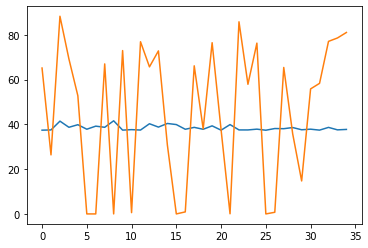

In [175]:
plt.plot(predictions_2)
plt.plot(df_working_hours_test["y"])

In [176]:
np.sqrt(np.mean((predictions_2 - df_working_hours_test["y"])**2))

32.326652865957634

# Prediction 3

In [157]:
df_working_hours = df[df["points"].notna()].reset_index()

In [158]:
df_working_hours.rename(columns={"0":"Baseline"}, inplace=True)

In [159]:
df_working_hours_train = df_working_hours.iloc[0:115].reset_index()
df_working_hours_test = df_working_hours.iloc[115:].reset_index()

In [160]:
# Don't really need the pre_survey, RMS stays the same. Taking out points also improves the RMS
ols_mod_train_2 = smf.ols(formula = "(y ~ points + weekly_poll + pre_survey + Baseline)",
                 data = df_working_hours_train)
ols_res_2 = ols_mod_train_2.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.052
Date:                Wed, 29 Apr 2020   Prob (F-statistic):              0.133
Time:                        18:59:20   Log-Likelihood:                -556.04
No. Observations:                 115   AIC:                             1118.
Df Residuals:                     112   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2088      1.044     -0.200      

In [161]:
int_index_test = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_test, inplace=True)

In [162]:
int_index_train = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_train, inplace=True)

In [163]:
predictions_3 = ols_res_2.predict(df_working_hours_test)

In [164]:
%matplotlib inline

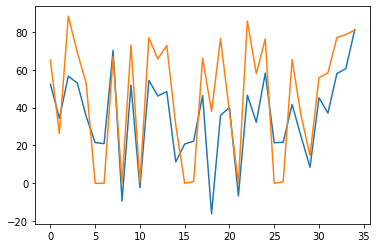

In [165]:
plt.plot(predictions_3)
plt.plot(df_working_hours_test["y"])

In [166]:
np.sqrt(np.mean((predictions_3 - df_working_hours_test["y"])**2))

21.67453049454774